In [1]:
%pylab inline
%reload_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

In [3]:
#Create Game Logic
rock,paper,knife = 0,1,2
def value(p1,p2) :
    if p1==p2:
        return 0
    elif p1==rock and p2== knife:
        return 1
    elif p1==knife and p2==paper:
        return 1
    elif p1==paper and p2==rock:
        return 1
    else:
        return -1

In [4]:
NUM_ACTIONS = 3
#rock, paper,knife in that order
regretSum = np.zeros(NUM_ACTIONS)
#statergy = np.zeros(3)
stratSum = np.zeros(NUM_ACTIONS)
oppStrat = np.array([0.4,0.3,0.3])

In [20]:
#Acumulate  stratSum abd return strat
def getStrat():
    global regretSum, stratSum
    strat = np.maximum(regretSum,0)
    normalizingSum = np.sum(strat)
    if normalizingSum > 0:
        strat /= normalizingSum
    else :
        strat = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    stratSum += strat
    strat = strat / np.sum(strat)
    return strat
#Use stratSum to obtain Average strategy
def getavgStrat():
    global stratSum
    normalizingSum = np.sum(stratSum)
    if normalizingSum > 0:
         avgstrat = stratSum /  normalizingSum
    else :
        avgstrat = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    return avgstrat

In [21]:
def getaction(strat):
    rr = random.random()
    return np.searchsorted(np.cumsum(strat),rr)

In [43]:
def train(itr):
    global regretSum
    #regretSum = np.zeros(NUM_ACTIONS)
    actionutil = np.zeros(NUM_ACTIONS)
    for i in range(itr):
        strat = getStrat() #obtain current strategy
        #select my action and opponent's action
        myAction = getaction(strat)
        otherAction = getaction(oppStrat)
        #for rock paper knife
        actionutil[otherAction]=0
        actionutil[(otherAction + 1)%NUM_ACTIONS] = 1
        actionutil[(otherAction-1) % NUM_ACTIONS ] = -1
        
        #accumulate action regrets
        regretSum += actionutil - actionutil[myAction]

In [40]:
train(100000)

In [41]:
getavgStrat()

array([0.00551152, 0.99342546, 0.00106303])

([<matplotlib.lines.Line2D at 0x7f3425faebe0>], 9.96)

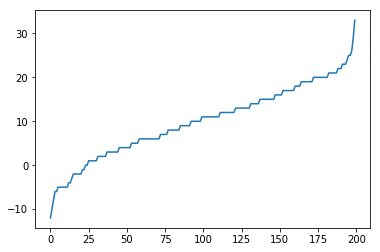

In [42]:
vv = []
for j in range(200):
    v=0
    for i in range(100):
        strat = getavgStrat()
        myAction = getaction(strat)
        otherAction = getaction(oppStrat)
        v += value(myAction,otherAction)
    vv.append(v)
plot(sorted(vv)),np.mean(vv)

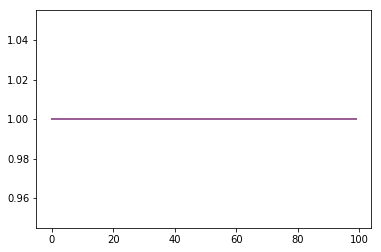

In [39]:
strat = getavgStrat()
for j in range(5):
    a = [getaction(getStrat()) for i in range(100)]
    plot (sorted(a))